**CS6700** : Reinforcement Learning

Assignment problem 04

*   **Environment** : [Taxi](https://www.gymlibrary.dev/environments/toy_text/taxi/)
*   **Algorithm** : SMDP and Intra Option Q-Learning Algorithm

In [1]:
''' Import required libraries'''
import numpy as np
import random
import gym
import glob
import io
import matplotlib.pyplot as plt
from IPython.display import HTML
import gym
import numpy as np
!pip install gym==0.15.3

In [3]:
env = gym.make('Taxi-v3')
print ("Number of states:", env.nS)

# Primitive Actions
# 0: move south; 1: move north; 2:move east; 3: move west; 4: pick passenger up; and 5: drop passenger of
action = ["south", "north", "east", "west","pickup","dropoff"]


print ("Number of actions that an agent can take:", env.nA)

# Example Transitions
rnd_action = random.randint(0, 5)
print ("Action taken:", action[rnd_action])
env.reset()
next_state, reward, is_terminal, t_prob = env.step(rnd_action)
print ("Transition probability:", t_prob)
print ("Next state:", next_state)
print ("Reward recieved:", reward)
print ("Terminal state:", is_terminal)
env.render()


Number of states: 500
Number of actions that an agent can take: 6
Action taken: pickup
Transition probability: {'prob': 1.0}
Next state: 104
Reward recieved: -10
Terminal state: False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)


In [4]:
# We are defining four options here
# Option 1 ["Red"] - > Move the taxi to the Position R
# Option 2 ["Green"] - > Move the taxi to the Position G
# Option 3 ["Yellow"] - > Move the taxi to the Position Y
# Option 4 ["Blue"] - > Move the taxi to the Position B


# Locations in the 5 x 5 where RGBY are marked
# locs = [(0, 0), (0, 4), (4, 0), (4, 3)]

# 0: move (down) south; 1: move (up) north; 
# 2:move east; (right) 3: move west (left);

def Red(env,state):
    
    optdone = False
    optact = -1
    #optact = random.randint(0, 3)
    taxi_row, taxi_col, pass_idx, dest_idx = env.decode(state)
        
    if (int(taxi_row) == 0 and int(taxi_col) == 0):
        optdone = True

    # Check taxi position and return action
    elif (int(taxi_col) == 0):
      optact = 1
      
    elif (int(taxi_row) < 2 and int(taxi_col) == 1):
      optact = 3

    elif (int(taxi_row) < 2 and int(taxi_col) > 1):
      optact = 0

    elif (int(taxi_row) == 2 and int(taxi_col) > 0):
      optact = 3

    else : 
      optact = 1

    return [optact,optdone]



def Green(env,state):
    
    optdone = False
    optact = -1
    #optact = random.randint(0, 3)
    taxi_row, taxi_col, pass_idx, dest_idx = env.decode(state)

    if (int(taxi_row) == 0 and int(taxi_col) == 4):
        optdone = True
    
    # Check taxi position and return action
    elif (int(taxi_row) == 0 and int(taxi_col) > 1):
        optact = 2

    elif (int(taxi_row) == 2 and int(taxi_col) < 4):
        optact = 2
    
    elif (int(taxi_row) < 2 and int(taxi_col) < 2):
        optact = 0 
    else:
        optact = 1

    return [optact,optdone]

def Yellow(env,state):
    
    optdone = False
    optact = -1
    #optact = random.randint(0, 3)
    taxi_row, taxi_col, pass_idx, dest_idx = env.decode(state)

    if (int(taxi_row) == 4 and int(taxi_col) == 0):
        optdone = True

     # Check taxi position and return action
    elif (int(taxi_row) < 2):
        optact =  0
    elif (int(taxi_row) > 2 and int(taxi_col) > 0):
        optact =  1
    elif (int(taxi_row) == 2 and int(taxi_col) > 0):
        optact = 3
    else : 
        optact = 0

    return [optact,optdone]

def Blue(env,state):
    
    optdone = False
    optact = -1
    #optact = random.randint(0, 3)
    taxi_row, taxi_col, pass_idx, dest_idx = env.decode(state)

    if (int(taxi_row) == 4 and int(taxi_col) == 3):
        optdone = True
    # Check taxi position and return action
    
    elif (int(taxi_row) == 4 and int(taxi_col) == 4):
        optact = 3
    elif (int(taxi_row) > 2 and int(taxi_col) <= 2):
        optact = 1
    elif (int(taxi_row) == 2 and int(taxi_col) <= 2):
        optact = 2
    else : 
        optact = 0 
      
    return [optact,optdone]

In [5]:
#Q-Table: (States x Actions) === (env.ns(500) x total actions + options (10))
Q = np.zeros([env.observation_space.n, 10])
print(Q.shape)
Update_Frequency = np.zeros([5,5])

# epsilon-greedy action selection function
seed = 42
rg = np.random.RandomState(seed)
def egreedy_policy(Q,state,epsilon,rg=rg):
    if not Q[state].any() or rg.rand() < epsilon:
        return rg.choice(Q.shape[-1])
    else:
        return np.argmax(Q[state])

(500, 10)


## SMDP Q-Learning 

In [6]:
#### SMDP Q-Learning 

import math
from collections import deque
alpha0 = 0.7
gamma =0.9
print_freq=500
num_episodes = 10000


def smdpq_learning(env, Q, gamma = 0.9, choose_action = egreedy_policy):

# Add parameters you might need here
    alpha = alpha0
    Q = np.zeros([env.observation_space.n, 10])
    Update_Frequency = np.zeros([5,5])
    frames = [] 
    episode_rewards = np.zeros(num_episodes)

    for ep in range(num_episodes):
       steps = 0
       state = env.reset()    
       done = False
       episode_reward = 0
       taxi_row, taxi_col, pass_idx, dest_idx = env.decode(state)
       
       # While episode is not over
       while not done:

         # Choose action        
         action = egreedy_policy(Q, state, epsilon=0.1)
         
         if action < 6:

            # Perform regular Q-Learning update for state-action pair

            next_state, reward, done,_ = env.step(action)
            taxi_row, taxi_col, pass_idx, dest_idx = env.decode(state)
            Q[state, action] += alpha*(reward + gamma*max(Q[next_state,:])- Q[state,  action])                                        
            episode_reward += reward  
            if done == True:
                  taxi_row, taxi_col, pass_idx, dest_idx = env.decode(state)
            state = next_state
            taxi_row, taxi_col, pass_idx, dest_idx = env.decode(state)
            Update_Frequency[taxi_row][taxi_col] += 1
              
                      
         # Checking if action chosen is an option
         if action >= 6: 

             optdone = False
             k=-1             
             state_temp = state

             while (optdone == False):
              
                k = k+1
                reward_bar = 0
                optact = -1

                taxi_row, taxi_col, pass_idx, dest_idx = env.decode(state_temp)
                
                # Check for Options 
                if action == 6: 
                   optact,optdone = Red(env,state_temp)
                   #print("Action - ",action," OptAct- ",optact) 
                elif action == 7: 
                    optact,optdone = Green(env,state_temp)
                    #print("Action - ",action," OptAct- ",optact) 
                elif action == 8:
                    optact,optdone = Yellow(env,state_temp)
                    #print("Action - ",action," OptAct- ",optact) 
                elif action == 9:   
                    optact,optdone = Blue(env,state_temp)
                    #print("Action - ",action," OptAct- ",optact) 

                if optdone == False:
                  next_state, reward, done,p = env.step(optact)
                  state_temp = next_state
                  reward_bar = (gamma**k)*reward + reward_bar
                  episode_reward += reward
                  taxi_row, taxi_col, pass_idx, dest_idx = env.decode(state_temp)
                  Update_Frequency[taxi_row][taxi_col] += 1
                                

             if state_temp == state :  # Same position as the option
                episode_reward += 0
             else : 
               Q[state,  action] += alpha*(reward_bar + (gamma**(k+1))*max(Q[next_state])- Q[state,  action])
               if done == True:
                  taxi_row, taxi_col, pass_idx, dest_idx = env.decode(state)
               state = next_state

       if (ep+1)%print_freq == 0 : 
         print("Episode : ",ep, " Rewards : ",episode_reward)

       episode_rewards[ep] = episode_reward
       frames.append({
                'frame': env.render(mode='ansi'),
                'state': state,
                'action': action,
                'reward': reward
                 })
    return Q, episode_reward,frames,episode_rewards,Update_Frequency

In [7]:
#Print the reward after every 500 episode

Q_avgs, reward_avgs, Update_Frequency_all = [], [], []
num_expts = 5

for i in range(num_expts):
    print("Experiment: %d"%(i+1))
    Q = np.zeros([env.observation_space.n, 10])
    Q_val,rewards,frames,episode_rewards,Update_Frequency = smdpq_learning(env,Q,gamma=gamma,choose_action=egreedy_policy)
    #env.render()
    Q_avgs.append(Q_val.copy())
    reward_avgs.append(episode_rewards)
    Update_Frequency_all.append(Update_Frequency)
    print("Max reward for Experiment: %d"%(i+1),max(episode_rewards))

Experiment: 1
Episode :  499  Rewards :  -245
Episode :  999  Rewards :  6
Episode :  1499  Rewards :  11
Episode :  1999  Rewards :  8
Episode :  2499  Rewards :  4
Episode :  2999  Rewards :  1
Episode :  3499  Rewards :  -11
Episode :  3999  Rewards :  3
Episode :  4499  Rewards :  1
Episode :  4999  Rewards :  -3
Episode :  5499  Rewards :  -1
Episode :  5999  Rewards :  4
Episode :  6499  Rewards :  4
Episode :  6999  Rewards :  7
Episode :  7499  Rewards :  2
Episode :  7999  Rewards :  -2
Episode :  8499  Rewards :  6
Episode :  8999  Rewards :  0
Episode :  9499  Rewards :  2
Episode :  9999  Rewards :  0
Max reward for Experiment: 1 15.0
Experiment: 2
Episode :  499  Rewards :  -2
Episode :  999  Rewards :  4
Episode :  1499  Rewards :  -14
Episode :  1999  Rewards :  2
Episode :  2499  Rewards :  1
Episode :  2999  Rewards :  0
Episode :  3499  Rewards :  -5
Episode :  3999  Rewards :  -11
Episode :  4499  Rewards :  1
Episode :  4999  Rewards :  11
Episode :  5499  Rewards :

### SMDP Q-Learning: Heatmap of Q-table

SMDP Q-Learning: Heatmap of Q-table


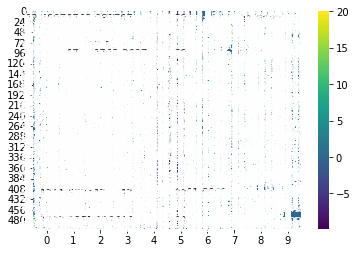

In [8]:
# Visualize Q values
import matplotlib.pylab as plt

print("SMDP Q-Learning: Heatmap of Q-table")
#Plot of State-Action values of SMDP Q-Learning
#plt.pcolor(np.average(Q_avgs, 0),edgecolors='g',linewidth=0.2)
#plt.show()

import seaborn as sns
sns.heatmap(np.average(Q_avgs, 0), annot=True, fmt="g", cmap='viridis')
plt.show()

### SMDP Reward curve

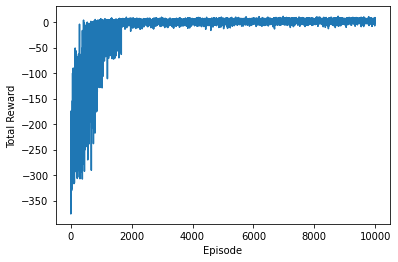

In [9]:
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.plot(np.arange(num_episodes),np.average(reward_avgs, 0))
plt.show()

### Experiment 1 Update Frequency heatmap

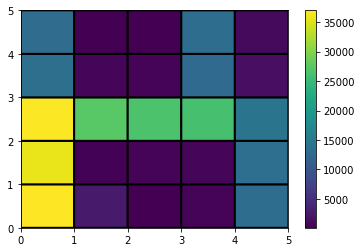

In [10]:
plt.pcolor(Update_Frequency_all[0], edgecolors='k', linewidths=2)
plt.colorbar()
plt.show()

### Experiment 1 Update Frequency table

In [11]:
np.set_printoptions(threshold=np.inf)
print(Update_Frequency_all[0])

[[37000.  2597.   210.   500. 13125.]
 [35750.   280.   439.   594. 13239.]
 [36839. 27351. 26616. 26162. 14284.]
 [13424.   584.   506. 12688.  1507.]
 [13061.   152.    89. 13113.  1088.]]


## Frames

In [12]:
# Below code is to render the environment
# Observe the State-action and rewards at each timestep

# Executed for our understanding only
from IPython.display import clear_output
from time import sleep
def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
        
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 10000
State: 475
Action: 5
Reward: 20


## Intra-Option Q-Learning 

In [13]:
#### Intra-Option Q-Learning 

alpha0 = 0.7
gamma =0.9
print_freq=500
# Iterate over 10000 episodes
num_episodes = 10000
def intra_opt_q_learning(env, Q, gamma = 0.9, choose_action = egreedy_policy):

    alpha = alpha0
    Q = np.zeros([env.observation_space.n, 10])
    Update_Frequency = np.zeros([5,5])
    episode_rewards = np.zeros(num_episodes)
 
    for ep in range(num_episodes):
       steps = 0
       state = env.reset()    
       done = False
       ep_reward = 0 
       frames = []
       
       # While episode is not over
       while not done:

         # Choose action        
         action = egreedy_policy(Q, state, epsilon=0.1)

         if action < 6:

            # Perform regular Q-Learning update for state-action pair
            next_state, reward, done,_ = env.step(action)
            Q[state, action] += alpha*(reward + gamma*max(Q[next_state])- Q[state,  action])                                          
            ep_reward += reward
            state = next_state
            taxi_row, taxi_col, pass_idx, dest_idx = env.decode(state)
            Update_Frequency[taxi_row][taxi_col] += 1

        # Checking if action chosen is an option
         
         if action >= 6:
             optdone = False   

             while (optdone == False):

                # Check for Options 
                if action == 6: 
                    optact,optdone = Red(env,state)
                    if optdone == False : 
                        next_state, reward, done,p = env.step(optact)
                        taxi_row, taxi_col, pass_idx, dest_idx = env.decode(next_state)
                        
                        if (int(taxi_row) == 0 and int(taxi_col) == 0):    # Terminated
                          Q[state,  action] += alpha*(reward + gamma*max(Q[next_state,:])- Q[state,  action])
                        else:  # Did not terminate
                          Q[state,  action] += alpha*(reward + gamma*(Q[next_state,action])- Q[state,  action]) 

                elif action == 7: 
                    optact,optdone = Green(env,state)
                    if optdone == False : 
                        next_state, reward, done,p = env.step(optact)
                        taxi_row, taxi_col, pass_idx, dest_idx = env.decode(next_state)
                        if (int(taxi_row) == 0 and int(taxi_col) == 4):    # Terminated
                          Q[state,  action] += alpha*(reward + gamma*max(Q[next_state,:])- Q[state,  action])
                        else:  # Did not terminate
                          Q[state,  action] += alpha*(reward + gamma*(Q[next_state,action])- Q[state,  action]) 
                
                elif action == 8: 
                    optact,optdone = Yellow(env,state)
                    if optdone == False : 
                        next_state, reward, done,p = env.step(optact)
                        taxi_row, taxi_col, pass_idx, dest_idx = env.decode(next_state)
                        if (int(taxi_row) == 4 and int(taxi_col) == 0):    # Terminated
                          Q[state,  action] += alpha*(reward + gamma*max(Q[next_state,:])- Q[state,  action])
                        else:  # Did not terminate
                          Q[state,  action] += alpha*(reward + gamma*(Q[next_state,action])- Q[state,  action]) 
                
                elif action == 9:   
                    optact,optdone = Blue(env,state)
                    if optdone == False : 
                        next_state, reward, done,p = env.step(optact)
                        taxi_row, taxi_col, pass_idx, dest_idx = env.decode(next_state)
                        if (int(taxi_row) == 4 and int(taxi_col) == 3):    # Terminated
                          Q[state,  action] += alpha*(reward + gamma*max(Q[next_state,:])- Q[state,  action])
                        else:  # Did not terminate
                          Q[state,  action] += alpha*(reward + gamma*(Q[next_state,action])- Q[state,  action]) 
                if optdone == False :        
                  state = next_state
                  taxi_row, taxi_col, pass_idx, dest_idx = env.decode(state)
                  Update_Frequency[taxi_row][taxi_col] += 1
                  ep_reward += reward

       if (ep+1)%print_freq == 0 : 
         print("Episode : ",ep, " Rewards : ",ep_reward)
       episode_rewards[ep] = ep_reward
       frames.append({
                'frame': env.render(mode='ansi'),
                'state': state,
                'action': action,
                'reward': reward
                 })
    return Q, ep_reward,frames,episode_rewards,Update_Frequency

In [14]:
#Print the reward after every 500 episode
#Q_val1,rewards,frames,episode_rewards,Update_Frequency = intra_opt_q_learning(env,Q,gamma=gamma,choose_action=egreedy_policy)

Q_avgs, reward_avgs, Update_Frequency_all_int = [], [], []
num_expts = 5

for i in range(num_expts):
    print("Experiment: %d"%(i+1))
    Q = np.zeros([env.observation_space.n, 10])
    Q_val,rewards,frames,episode_rewards,Update_Frequency = intra_opt_q_learning(env,Q,gamma=gamma,choose_action=egreedy_policy)
    Q_avgs.append(Q_val.copy())
    reward_avgs.append(episode_rewards)
    Update_Frequency_all_int.append(Update_Frequency)
    print("Max reward for Experiment: %d"%(i+1),max(episode_rewards))

Experiment: 1
Episode :  499  Rewards :  11
Episode :  999  Rewards :  8
Episode :  1499  Rewards :  -25
Episode :  1999  Rewards :  6
Episode :  2499  Rewards :  5
Episode :  2999  Rewards :  9
Episode :  3499  Rewards :  9
Episode :  3999  Rewards :  -21
Episode :  4499  Rewards :  11
Episode :  4999  Rewards :  11
Episode :  5499  Rewards :  8
Episode :  5999  Rewards :  12
Episode :  6499  Rewards :  10
Episode :  6999  Rewards :  4
Episode :  7499  Rewards :  -12
Episode :  7999  Rewards :  10
Episode :  8499  Rewards :  -5
Episode :  8999  Rewards :  -2
Episode :  9499  Rewards :  -14
Episode :  9999  Rewards :  4
Max reward for Experiment: 1 15.0
Experiment: 2
Episode :  499  Rewards :  -31
Episode :  999  Rewards :  -12
Episode :  1499  Rewards :  10
Episode :  1999  Rewards :  -34
Episode :  2499  Rewards :  14
Episode :  2999  Rewards :  -92
Episode :  3499  Rewards :  3
Episode :  3999  Rewards :  -66
Episode :  4499  Rewards :  -3
Episode :  4999  Rewards :  8
Episode :  54

### Intra Option Q-Learning: Heatmap of Q-table

INTRA Option Q-Learning: Heatmap of Q-table


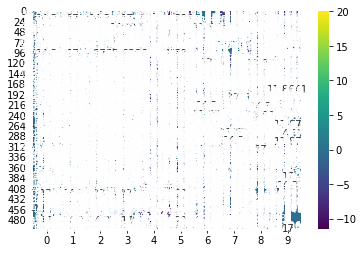

In [15]:
# Visualize Q values
import matplotlib.pylab as plt

print("INTRA Option Q-Learning: Heatmap of Q-table")

#Plot of State-Action values of INTRA Option Q-Learning
import seaborn as sns
sns.heatmap(np.average(Q_avgs, 0), annot=True, fmt="g", cmap='viridis')
plt.show()



### Intra Option Q-Learning: Reward curve

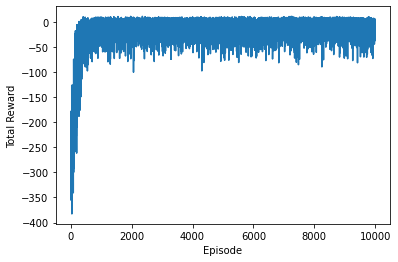

In [16]:
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.plot(np.arange(num_episodes),np.average(reward_avgs, 0))
plt.show()

#### Intra Option Q-Learning: Heatmap of Update frequency
Only for Experiment 1

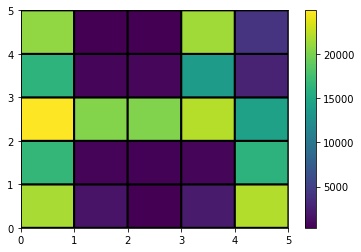

In [17]:
plt.pcolor(Update_Frequency_all_int[0], edgecolors='k', linewidths=2)
plt.colorbar()
plt.show()

#### Intra Option Q-Learning: Update frequency Table

In [18]:
np.set_printoptions(threshold=np.inf)
print(Update_Frequency_all_int[0])

[[21714.  1590.   399.  2114. 22112.]
 [16663.   605.   506.   622. 16177.]
 [24937. 20363. 20277. 22184. 14429.]
 [16261.   712.   738. 13864.  2733.]
 [20862.   330.   344. 21385.  4076.]]


In [19]:
# Below code is to render the environment
# Observe the State-action and rewards at each timestep

# Executed for our understanding only
from IPython.display import clear_output
from time import sleep
def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
        
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 1
State: 410
Action: 5
Reward: 20
